In [169]:
import numpy as np
import glob
import os

import numpy as np
import glob
import os
import matplotlib.pyplot as plt






from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


import matplotlib.pyplot as plt
import numpy as np

In [170]:
E = lambda r0,r,a, D, r1: D* ( np.exp(-2*a*(r-r0)) -2 *np.exp(-a*(r-r0)))

Equartic = lambda K, B1, B2, Rc, U0,r: K*((r-Rc)**2) *(r-Rc-B2)+U0+4*((1/r)**12 -(1/r)**6)+1

In [171]:
(4.125*2.5*2)+np.log(2)/a

89.93971805599453

In [596]:

a =.05

r0 = (4.125*2.5*2)
D=.01

r1 = 2*4.125*2.5*1.4
r = np.linspace(0,1000,10000)


In [597]:
K = 1200
B1 =- .55
B2 = -.25
Rc = 1.3
U0 = -34.6878
r=np.linspace(2*4.125*2.5*.4,2*4.125*2.5*1.4,1000)

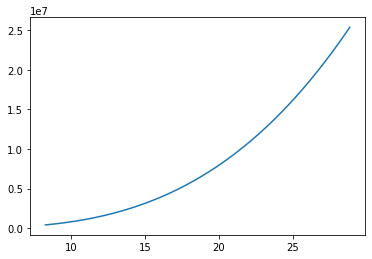

In [598]:
plt.plot(r,Equartic(K,B1,B2,Rc,U0,r))

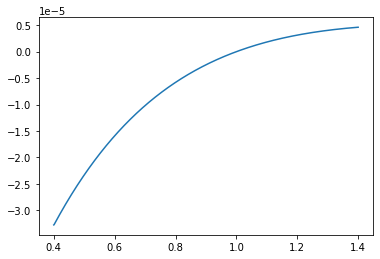

In [599]:
plt.plot(r/(4.125*2.5*2),np.gradient(E(r0,r,a,D,r1)))

In [600]:
file = "output.bp" 


In [466]:
f = open(file)

In [467]:
t_str = []
with open (file) as myfile:
    i=0
    for line in myfile:
        if i==1:
            t_str.append(line)
            i=0
        if "ITEM: TIMESTEP\n" in line:
            i=1
            


In [468]:
t_arr = [int(i) for i in t_str]

In [469]:
len(t_arr)

52

In [470]:
cell_arr  = np.zeros((len(t_arr) - 1,6851, 9))
for t in range(len(t_arr)-1):
    i=0
    i_end=t
    cell_str = []
    with open (file) as myfile:
        for line in myfile:

            if ("ITEM: ATOMS" in line) and (i==i_end):
                break

            if ("ITEM: ATOMS" in line) and (i<i_end):
                i+=1

        for line in myfile:
            if "ITEM: TIMESTEP" in line:
                break
            cell_str.append(line)
            
            
    cell_arr[t] = np.array([np.array(cell_str[i].split( )[1:]).astype(float) for i in range(len(cell_str))])

            

            


ValueError: could not broadcast input array from shape (6131,9) into shape (6851,9)

[0. 0. 0. ... 0. 0. 0.]


<ipython-input-471-e6bdb09dd4fd>:31: RuntimeWarning: divide by zero encountered in log
  im = ax.scatter(x, y, z,c=np.log(f),s=40,
<ipython-input-471-e6bdb09dd4fd>:32: RuntimeWarning: divide by zero encountered in log
  vmin=np.log(np.min(np.sum(cell_arr[:,:,7:]**2,axis=2)**.5)),
<ipython-input-471-e6bdb09dd4fd>:33: RuntimeWarning: divide by zero encountered in log
  vmax=np.log(np.max(np.sum(cell_arr[:,:,7:]**2,axis=2)**.5)),


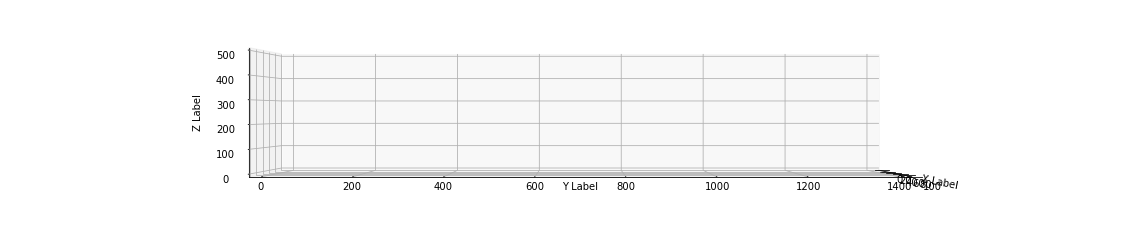

In [471]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(111, projection='3d')



n = 300

t = 13
xlim=90
ylim = 1400
zlim=300
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for m in arr:
#    ax.scatter(*m[1:4],s= (m[4])**2,cmap='viridis')
x=cell_arr[t,:,0].flatten()*xlim
y= cell_arr[t,:,1].flatten()*ylim
z=cell_arr[t,:,2].flatten()*zlim
f = np.sum(cell_arr[t,:,7:]**2,axis=1)**.5

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([0,100])
ax.set_ylim([0,1400])

ax.set_zlim([0,500])



im = ax.scatter(x, y, z,c=np.log(f),s=40,
                vmin=np.log(np.min(np.sum(cell_arr[:,:,7:]**2,axis=2)**.5)),
                vmax=np.log(np.max(np.sum(cell_arr[:,:,7:]**2,axis=2)**.5)),
                cmap='viridis');
ax.view_init(0, 360)

print(f)


plt.show()


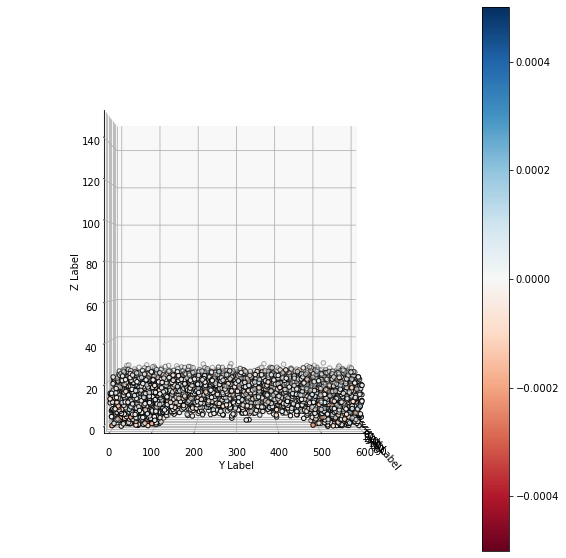

In [611]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
t =10#len(t_arr)-1
i=0
i_end=t
cell_str = []
with open (file) as myfile:
    for line in myfile:

        if ("ITEM: ATOMS" in line) and (i==i_end):
            break

        if ("ITEM: ATOMS" in line) and (i<i_end):
            i+=1

    for line in myfile:
        if "ITEM: TIMESTEP" in line:
            break
        cell_str.append(line)


cell_arr = np.array([np.array(cell_str[i].split( )[1:]).astype(float) for i in range(len(cell_str))])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ims=[]


cell_arr  = np.zeros((6131, 9))
for t in range(len(t_arr)-1):
    
    i=0
    i_end=t
    cell_str = []
    with open (file) as myfile:
        for line in myfile:

            if ("ITEM: ATOMS" in line) and (i==i_end):
                break

            if ("ITEM: ATOMS" in line) and (i<i_end):
                i+=1

        for line in myfile:
            if "ITEM: TIMESTEP" in line:
                break
            cell_str.append(line)
            
            
    xlim=90
    ylim = 600
    zlim=100
    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    #for m in arr:
    #    ax.scatter(*m[1:4],s= (m[4])**2,cmap='viridis')
    x=cell_arr[:,0].flatten()*xlim
    y= cell_arr[:,1].flatten()*ylim
    z=cell_arr[:,2].flatten()*zlim
    f = np.sum(cell_arr[:,6:]**2,axis=1)**.5
    fx = cell_arr[:,6]
    fy = cell_arr[:,7]
    fz = cell_arr[:,8]

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim([0,90])
    ax.set_ylim([0,600])

    ax.set_zlim([0,150])

    

            
    cell_arr = np.array([np.array(cell_str[i].split( )[1:]).astype(float) for i in range(len(cell_str))])

            
    im = ax.scatter(x, y, z,c=fz,s=20,edgecolor='k',
                    vmin=-.00005,
                    vmax=.00005,
                    cmap='RdBu')
    ax.view_init(0, 360)



    ims.append([im])
    

im = ax.scatter(x, y, z,c=fz,s=20,edgecolor='k',
                    vmin=-.0005,
                    vmax=.0005,
                cmap='RdBu')
plt.colorbar(im)


ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                            repeat_delay=500)

ani.save('test.gif', writer= 'imagemagick' , fps=30)

plt.show()

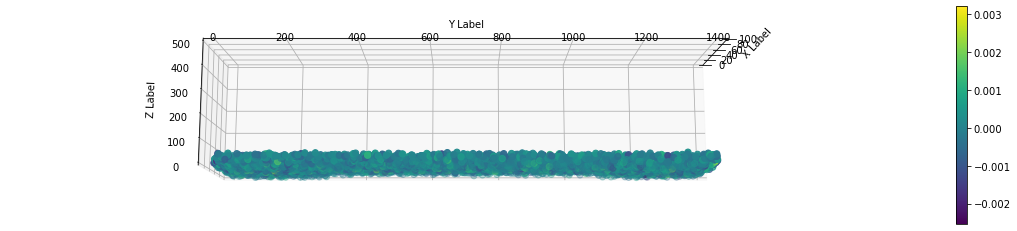

In [530]:
t = 2#len(t_arr)-1
i=0
i_end=t
cell_str = []
with open (file) as myfile:
    for line in myfile:

        if ("ITEM: ATOMS" in line) and (i==i_end):
            break

        if ("ITEM: ATOMS" in line) and (i<i_end):
            i+=1

    for line in myfile:
        if "ITEM: TIMESTEP" in line:
            break
        cell_str.append(line)


cell_arr = np.array([np.array(cell_str[i].split( )[1:]).astype(float) for i in range(len(cell_str))])

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(111, projection='3d')


xlim=90
ylim = 1400
zlim=150
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for m in arr:
#    ax.scatter(*m[1:4],s= (m[4])**2,cmap='viridis')
x=cell_arr[:,0].flatten()*xlim
y= cell_arr[:,1].flatten()*ylim
z=cell_arr[:,2].flatten()*zlim
f = np.sum(cell_arr[:,6:]**2,axis=1)**.5
fx = cell_arr[:,6]
fy = cell_arr[:,7]
fz = cell_arr[:,8]

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([0,100])
ax.set_ylim([0,1400])

ax.set_zlim([0,500])



im = ax.scatter(x, y, z,c=fy,s=40,
                vmin=np.min(fy),
                vmax=np.max(fy),
                cmap='viridis')
ax.view_init(-10, 360)
plt.colorbar(im)


plt.show()

In [531]:
np.min(fz)

-0.00308617

In [1104]:
line

'6483 0.942506 0.985888 0.950347 0 0 0 -0.00268187 0.0877156 0.350248 \n'

In [781]:
z

array([286.1148, 292.1961, 291.6669, ..., 287.4093, 289.647 , 283.7172])